In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# !apt install fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import matplotlib.font_manager as fm

In [3]:
plt.rc('font', family='NanumGothic') 
# gt = font_manager.FontProperties(fname='C:/WINDOWS/Fonts/Malgun Gothic.ttf')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤2_제주유기견/설문결과-Raw-Data.csv',sep=',')

In [6]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','d1','d2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,d1,d2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [7]:
# 우혁오빠 원본
# clean_df = df.drop(['d1','d2','d5','d6'], axis = 1) # 라이프 스타일, 직업 
# real_df = clean_df.drop(0,axis=0)
# real_df.head()

In [8]:
real_df = df.drop(['d1','d2','d5','d6'], axis = 1) # 라이프 스타일, 직업 
# real_df = clean_df.drop(0,axis=0)
real_df.head()

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,나이,털길이,품종,색상,크기,성격,공고기간,입양희망여부,조사 나이대,성별
0,1,1,2,3,4,2,2,5,4,2,...,4,4,4,4,3,2,4,1,61,1
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,3,4,4,4,2,26,1
2,1,1,2,4,4,2,2,4,4,1,...,3,3,4,3,3,2,3,2,46,1
3,1,2,3,2,2,3,2,2,2,2,...,4,4,4,4,3,4,4,3,53,2
4,1,2,3,2,2,3,3,4,4,2,...,3,3,4,4,3,3,3,2,41,2


In [9]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [10]:
old_range = {'경험':{2:0}, '인식매체':{2:0}, '입양희망여부' :{2:0}, '성별' : {2:0}} 
# 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자 , 인식매체 0 오프라인, 1 온라인,  경험 0 아니오, 1 예
logi_df = real_df.replace(old_range)
logi_df.shape

(204, 21)

# 로지스틱 회귀분석 (종속변수 = 입양희망여부)

In [11]:
logi_df.describe().T #입양 희망여부 평균 0.497 => 결과변수 균형잡힘

,count,mean,std,min,25%,50%,75%,max
인식매체,204.0,0.901961,0.298099,0.0,1.00,1.0,1.0,1.0
경험,204.0,0.720588,0.449814,0.0,0.00,1.0,1.0,1.0
인식,204.0,3.299020,0.964288,1.0,3.00,3.0,4.0,5.0
관심도,204.0,3.411765,1.126072,1.0,3.00,4.0,4.0,5.0
지식,204.0,3.117647,0.995498,1.0,2.00,3.0,4.0,5.0
구성원동의,204.0,3.181373,1.162402,1.0,2.00,3.0,4.0,5.0
환경,204.0,2.774510,1.152482,1.0,2.00,3.0,4.0,5.0
비용지불의사,204.0,3.147059,1.198497,1.0,2.00,3.0,4.0,5.0
정부지원정책,204.0,3.651961,1.069711,1.0,3.00,4.0,4.0,5.0
犬성별,204.0,1.524510,0.500627,1.0,1.00,2.0,2.0,2.0


In [12]:
logi_df.max()

인식매체       1
경험         1
인식         5
관심도        5
지식         5
구성원동의      5
환경         5
비용지불의사     5
정부지원정책     5
犬성별        2
중성화        5
나이         5
털길이        5
품종         5
색상         5
크기         5
성격         5
공고기간       5
입양희망여부     1
조사 나이대    68
성별         1
dtype: int64

In [13]:
logi_df["입양희망여부"].value_counts() # 0 입양x, 1 입양 o

1    102
0    102
Name: 입양희망여부, dtype: int64

In [14]:
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


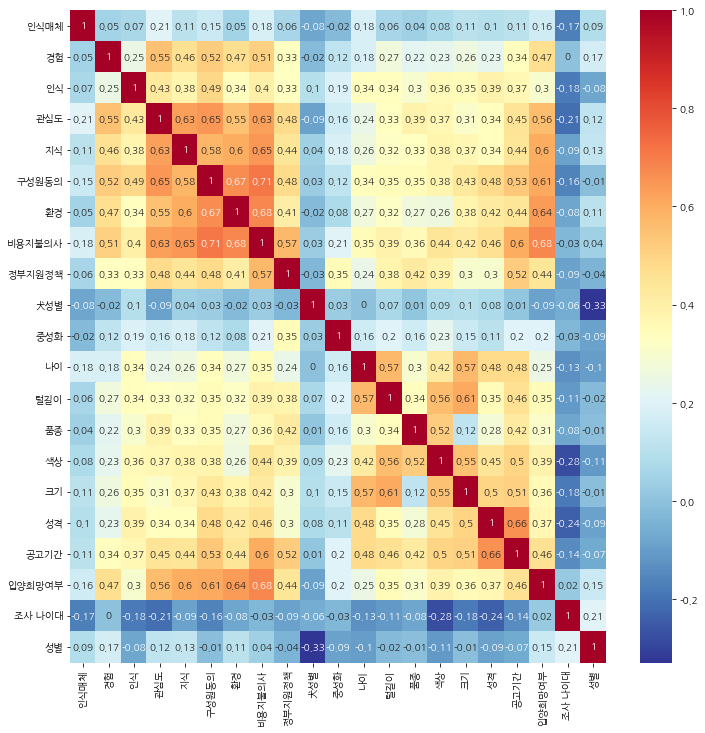

In [15]:
plt.figure(figsize=(12,12))
corr_=logi_df.corr().round(2)
sns.heatmap(corr_, annot=True, cmap = 'RdYlBu_r')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

plt.show()

In [16]:
x = logi_df.drop('입양희망여부', axis=1)  #변수 지정
y = logi_df['입양희망여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
log = LogisticRegression() #로지스틱 회귀분석 시행
log.fit(x_train, y_train) #모델 학습
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))   #모델의 정확도 확인
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))    #모델의 정확도 확인

학습용 데이터셋 정확도 : 0.91
검증용 데이터셋 정확도 : 0.89


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.86      0.89      0.87        27

    accuracy                           0.89        62
   macro avg       0.88      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62



In [19]:
logit = sm.Logit(logi_df[['입양희망여부']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.360905
         Iterations 7


In [20]:
result.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 입양희망여부   No. Observations:                  204
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                           19
Date:                Thu, 10 Nov 2022   Pseudo R-squ.:                  0.4793
Time:                        16:52:08   Log-Likelihood:                -73.625
converged:                       True   LL-Null:                       -141.40
Covariance Type:            nonrobust   LLR p-value:                 1.287e-19
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
인식매체          -0.4863      0.725     -0.670      0.503      -1.908       0.936
경험             0.6733      0.623      1.080      0.280      -0.548       1.895
인식            -0.4313      0.302     -1.430      0.153      -1.022       0.160
관심도           -0.1822      0.327     -0.557      0.577      -0.823       0.459
지식             0.6700      0.328      2.043      0.041       0.027       1.313
구성원동의          0.5691      0.346      1.643      0.100      -0.110       1.248
환경             0.5517      0.276      2.001      0.045       0.011       1.092
비용지불의사         1.3505      0.344      3.928      0.000       0.677       2.024
정부지원정책        -0.2243      0.280     -0.801      0.423      -0.773       0.324
犬성별           -1.7830      0.481     -3.704      0.000      -2.727      -0.839
중성화           -0.2761      0.267     -1.033      0.302      -0.800       0.248
나이            -0.7194      0.377     -1.906      0.057      -1.459       0.020
털길이            0.4904      0.364      1.347      0.178      -0.223       1.204
품종            -0.2705      0.370     -0.732      0.464      -0.995       0.454
색상             0.2475      0.359      0.689      0.491      -0.456       0.951
크기            -0.0626      0.317     -0.198      0.843      -0.683       0.558
성격            -0.1098      0.337     -0.325      0.745      -0.771       0.551
공고기간          -0.0812      0.380     -0.214      0.831      -0.826       0.664
조사 나이대        -0.0323      0.020     -1.581      0.114      -0.072       0.008
성별            -0.3113      0.525     -0.593      0.553      -1.340       0.717
==============================================================================
"""

In [21]:
np.exp(result.params) #오즈비가 1 기준으로 큰지 작은지 파악 1과 값이 수렴한다면 영향 x

인식매체      0.614916
경험        1.960753
인식        0.649654
관심도       0.833433
지식        1.954327
구성원동의     1.766655
환경        1.736236
비용지불의사    3.859521
정부지원정책    0.799081
犬성별       0.168132
중성화       0.758770
나이        0.487056
털길이       1.632912
품종        0.762982
색상        1.280792
크기        0.939358
성격        0.896006
공고기간      0.921970
조사 나이대    0.968195
성별        0.732506
dtype: float64

In [22]:
# xx = np.linspace(-3, 3, 100)
# mu = result.predict(sm.add_constant(xx))

# plt.figure(figsize=(12, 8))
# plt.plot(xx, mu, lw=3)
# plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
# plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
#             s=100, edgecolor="k", lw=1)
# plt.vlines(0.118, ymin=0, ymax=1, lw=1, linestyles='--', colors="red")
# plt.xlim(-3, 3)
# plt.xlabel("x")
# plt.ylabel(r"$\mu$")
# plt.title(r"$\hat{y} = \mu(x)$")
# plt.legend()
# # plt.savefig('predicted_value_y_hat_logistic_regression_example')
# plt.show()